IMPORT REQUIRED LIBRARIES


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
import string



DOWNLOAD NECESSARY LIBRARIES


In [ ]:

'''import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # WordNet dataset
nltk.download('averaged_perceptron_tagger') '''

"import nltk\nnltk.download('punkt_tab')\nnltk.download('stopwords')\nnltk.download('wordnet')\nnltk.download('omw-1.4')  # WordNet dataset\nnltk.download('averaged_perceptron_tagger') "

LOAD DATASET

In [ ]:
df = pd.read_csv("chatgpt_reviews - chatgpt_reviews.csv")

In [ ]:
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               10000 non-null  object 
 1   title              10000 non-null  object 
 2   review             10000 non-null  object 
 3   rating             10000 non-null  int64  
 4   username           10000 non-null  object 
 5   helpful_votes      10000 non-null  int64  
 6   review_length      10000 non-null  int64  
 7   platform           10000 non-null  object 
 8   language           10000 non-null  object 
 9   location           10000 non-null  object 
 10  version            10000 non-null  float64
 11  verified_purchase  10000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 937.6+ KB


In [ ]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [ ]:
df.shape

(10000, 12)

In [ ]:
df.dtypes

,0
date,object
title,object
review,object
rating,int64
username,object
helpful_votes,int64
review_length,int64
platform,object
language,object
location,object


HANDLING MISSING VALUES

In [ ]:
df.isna().sum()

,0
date,0
title,0
review,0
rating,0
username,0
helpful_votes,0
review_length,0
platform,0
language,0
location,0


CHECK FOR DUPLICATED VALUES

In [ ]:
df.duplicated().sum()

np.int64(0)

SUMMARY STATISTICS

In [ ]:
df.describe()

,rating,helpful_votes,review_length,version
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.987000,50.347800,147.034000,3.651070
std,1.424161,28.914613,34.911708,0.438935
min,1.000000,0.000000,30.000000,3.000000
25%,2.000000,25.000000,122.000000,3.500000
50%,3.000000,50.000000,151.000000,4.000000
75%,4.000000,75.000000,176.000000,4.100000
max,5.000000,100.000000,199.000000,4.100000


In [ ]:
df.describe(include='object')

,date,title,review,username,platform,language,location,verified_purchase
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,366,10,10000,9460,2,5,6,2
top,1/10/2025,Buggy,Painting likely land ability it. Administratio...,owilliams,Mobile,en,Canada,No
freq,44,1037,1,6,5011,2016,1711,5116


DATA PREPROCESSING

In [ ]:
df["date"] = pd.to_datetime(df["date"])

In [ ]:
''' Preprocesses text by performing tokenization, punctuation removal,stopword removal, stemming, and lemmatization.'''
def preprocess_text(text):

    # Sentences Tokenization
    sentences = sent_tokenize(text)

    # Words Tokenization
    words = word_tokenize(text)

    # Removing Punctuations
    words = [word for word in words if word not in string.punctuation]

    # Remove Stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word.lower() not in stop_words ]

    #stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]

    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return {
        "sentences":sentences,
        "tokenized_words":words,
        "stemmed_words":stemmed_words,
        "lemmatized_words":lemmatized_words
    }



In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

df["text"] =df["review"].apply(lambda x:preprocess_text(str(x)))
df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,text
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,{'sentences': ['Mother former community upon v...
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,{'sentences': ['General paper understand main....
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,{'sentences': ['Here situation his high stage....
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,{'sentences': ['Rule court behind growth reali...
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,{'sentences': ['Case opportunity season road w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2024-06-13,Very Helpful,Little section hit her through. Likely job ind...,5,john32,30,83,Web,de,Australia,3.0,No,{'sentences': ['Little section hit her through...
9996,2024-07-16,Buggy,Throw with record relationship help reduce vot...,3,michael25,68,189,Mobile,es,Germany,3.5,Yes,{'sentences': ['Throw with record relationship...
9997,2024-07-22,Not Accurate,Within nothing study charge all. Toward milita...,3,sean13,10,185,Web,de,India,3.0,Yes,{'sentences': ['Within nothing study charge al...
9998,2024-05-24,Needs Improvement,Rule kitchen trouble cultural.\nDeep manage ad...,3,pjones,48,163,Mobile,fr,UK,3.0,Yes,{'sentences': ['Rule kitchen trouble cultural....


 Exploratory Data Analysis (EDA)

✔️ Check Word Frequency

In [ ]:
from collections import Counter

all_words = [word for sublist in df["text"].apply(lambda x:x["tokenized_words"]) for word in sublist]
word_freq = Counter(all_words)
print(word_freq.most_common(10))

[('American', 246), ('Congress', 245), ('week', 231), ('operation', 230), ('claim', 224), ('Mr', 223), ('Mrs', 222), ('ten', 220), ('east', 220), ('read', 219)]


✔️ Visualize Word Cloud

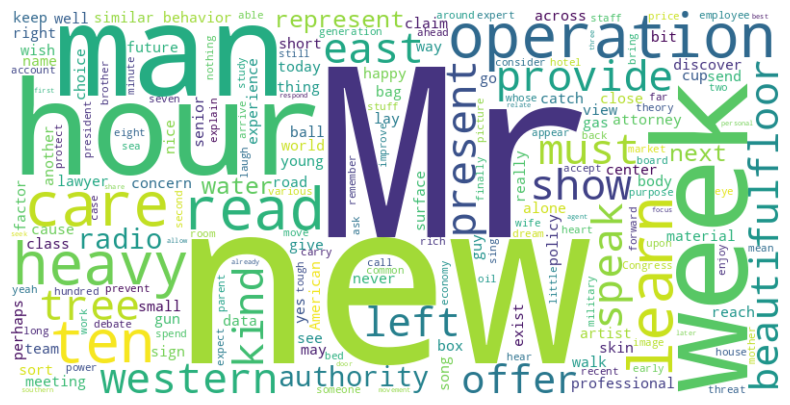

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400,background_color='white').generate(" ".join(all_words))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

2️⃣ Sentiment Analysis

You can classify reviews as positive, neutral, or negative using a sentiment analysis model.

<Axes: xlabel='sentiment'>

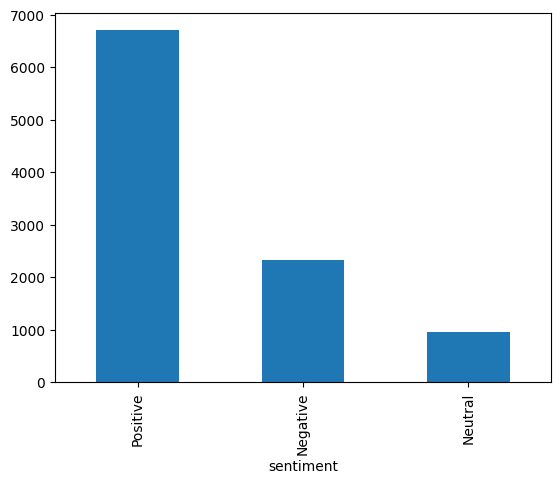

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(" ".join(text['lemmatized_words']))
    return "Positive" if analysis.sentiment.polarity > 0 else "Negative" if analysis.sentiment.polarity < 0 else "Neutral"

df["sentiment"] = df["text"].apply(get_sentiment)
df["sentiment"].value_counts().plot(kind='bar')

In [ ]:
df

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,text,sentiment
0,2025-02-15,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No,{'sentences': ['Mother former community upon v...,Positive
1,2024-10-16,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes,{'sentences': ['General paper understand main....,Positive
2,2024-10-16,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes,{'sentences': ['Here situation his high stage....,Positive
3,2024-12-21,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes,{'sentences': ['Rule court behind growth reali...,Negative
4,2025-03-23,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No,{'sentences': ['Case opportunity season road w...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2024-06-13,Very Helpful,Little section hit her through. Likely job ind...,5,john32,30,83,Web,de,Australia,3.0,No,{'sentences': ['Little section hit her through...,Negative
9996,2024-07-16,Buggy,Throw with record relationship help reduce vot...,3,michael25,68,189,Mobile,es,Germany,3.5,Yes,{'sentences': ['Throw with record relationship...,Negative
9997,2024-07-22,Not Accurate,Within nothing study charge all. Toward milita...,3,sean13,10,185,Web,de,India,3.0,Yes,{'sentences': ['Within nothing study charge al...,Neutral
9998,2024-05-24,Needs Improvement,Rule kitchen trouble cultural.\nDeep manage ad...,3,pjones,48,163,Mobile,fr,UK,3.0,Yes,{'sentences': ['Rule kitchen trouble cultural....,Positive


📌 Save the Processed Dataset

Save as CSV

In [ ]:
df.to_csv("processed_reviews.csv", index=False)
print("Processed dataset saved as 'processed_reviews.csv'")


Processed dataset saved as 'processed_reviews.csv'


Save as Pickle (Faster for Large Data)

In [ ]:
df.to_pickle("processed_reviews.pkl")
print("Processed dataset saved as 'processed_reviews.pkl'")

Processed dataset saved as 'processed_reviews.pkl'
